In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# installing required Modules

In [ ]:
# install simpletransformers
!pip install simpletransformers

# check installed version
!pip freeze | grep simpletransformers
# simpletransformers==0.28.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 249 kB 7.4 MB/s 
     |████████████████████████████████| 1.8 MB 14.2 MB/s 
     |████████████████████████████████| 9.1 MB 21.2 MB/s 
     |████████████████████████████████| 362 kB 65.9 MB/s 
     |████████████████████████████████| 6.6 MB 841 kB/s 
     |████████████████████████████████| 1.2 MB 58.9 MB/s 
     |████████████████████████████████| 43 kB 2.6 MB/s 
     |████████████████████████████████| 4.4 MB 49.0 MB/s 
     |████████████████████████████████| 101 kB 14.5 MB/s 
     |████████████████████████████████| 596 kB 57.6 MB/s 
     |████████████████████████████████| 181 kB 68.9 MB/s 
     |████████████████████████████████| 145 kB 65.8 MB/s 
     |████████████████████████████████| 63 kB 2.3 MB/s 
     |████████████████████████████████| 1.1 MB 56.6 MB/s 
     |████████████████████████████████| 140 kB 60.1 MB/s 
     |███████████████████████████████

simpletransformers==0.63.7


In [ ]:
pip install googletrans==3.1.0a0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 55 kB 3.3 MB/s 
     |████████████████████████████████| 1.3 MB 15.4 MB/s 
     |████████████████████████████████| 42 kB 1.6 MB/s 
     |████████████████████████████████| 65 kB 4.9 MB/s 
     |████████████████████████████████| 53 kB 3.0 MB/s 
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16367 sha256=0688408d3673cc6d194eee4d6fc4e9ea21e9cda9f832e533bcfc0867a72d58e9
  Stored in directory: /root/.cache/pip/wheels/0c/be/fe/93a6a40ffe386e16089e44dad9018ebab9dc4cb9eb7eab65ae
Successfully built googletrans


In [ ]:
pip install parsivar

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 36.2 MB 403 kB/s 
     |████████████████████████████████| 1.5 MB 17.2 MB/s 
  Created wheel for parsivar: filename=parsivar-0.2.3-py3-none-any.whl size=36492972 sha256=935f03aec402c8c5ede27a1437802e17f536ba2a7ffc0424fa8590f178ba0609
  Stored in directory: /root/.cache/pip/wheels/ae/67/7a/49cbf08f64d3f76a26eceaf0e481a40e233f05d4356875cbed
  Created wheel for nltk: filename=nltk-3.4.5-py3-none-any.whl size=1449923 sha256=5c031d1c0ab21a50903d3ddc69486ee4005884e0868dbf1aa09313d6c1038c32
  Stored in directory: /root/.cache/pip/wheels/48/8b/7f/473521e0c731c6566d631b281f323842bbda9bd819eb9a3ead
Successfully built parsivar nltk
  Attempting uninstall: nltk
    Found existing installation: nltk 3.7
    Uninstalling nltk-3.7:
      Successfully uninstalled nltk-3.7


loading train and validation data

In [ ]:
train_data = pd.read_csv("/content/drive/MyDrive/train.csv") 
validation_data = pd.read_csv("/content/drive/MyDrive/dev.csv") 

# Preprocess text

check for missing values

In [ ]:
# Count total NaN at each column in train set
print(" \nCount total NaN at each column in train set : \n\n",
      train_data.isnull().sum())

# Count total NaN at each column in validation set
print(" \nCount total NaN at each column in validation set : \n\n",
      validation_data.isnull().sum())

 
Count total NaN at each column in train set : 

 Column1     0
comment     0
label       0
label_id    0
dtype: int64
 
Count total NaN at each column in validation set : 

 Column1     0
comment     0
label       0
label_id    0
dtype: int64


# removing stopwords

In [ ]:
path = "/content/drive/MyDrive/persian_stopwords.txt"
stop_words = []
f = open(path, "r", encoding='utf-8-sig')
for x in f:
    stop_words.append(x.rstrip("\n"))

train_data['comment'] = train_data['comment'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
validation_data['comment'] = validation_data['comment'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

# separate english part of comments and translate it

In [ ]:
import re
from googletrans import Translator

def english_handle(text):
  english_part = ""
  farsi_part = ""

  translator=Translator()

  for word in text.split():
    z = re.match("[A-Za-z]+", word)
    if z:
      english_part += word + ' '
    else:
      farsi_part += word + ' '

  if english_part != "":
    a = translator.detect(english_part)
    if a.lang == 'en':
      text=(english_part)
      destination_language = {
          "Persian": "FA",

      }
      
      for key, value in destination_language.items():
          english_part = translator.translate(text, dest=value).text

  new_text = farsi_part + english_part

  return new_text

In [ ]:
train_data['comment']=train_data['comment'].apply(english_handle)
validation_data['comment']=validation_data['comment'].apply(english_handle)

# normalizing text

In [ ]:
from parsivar import Normalizer
from parsivar import Tokenizer
from parsivar import FindStems

my_normalizer = Normalizer(pinglish_conversion_needed=True)
my_tokenizer = Tokenizer()
my_stemmer = FindStems()

# second_normalizer = Normalizer(statistical_space_correction=True)

def preprocess(text):
  tokens = my_tokenizer.tokenize_words(my_normalizer.normalize(text))
  stemmed_tokens = []
  for token in tokens:
      stemmed_tokens.append(my_stemmer.convert_to_stem(token))

  clean_text = "".join([word + " " for word in stemmed_tokens])
  clean_text = re.sub('[a-zA-Z]+', '', clean_text)
  clean_text = clean_text.replace('\u200c', ' ')

  return clean_text
  

def remove_consec_duplicates(s):
    new_s = ""
    prev = ""
    for c in s:
        if len(new_s) == 0:
            new_s += c
            prev = c
        if c == prev:
            continue
        else:
            new_s += c
            prev = c
    return new_s

In [ ]:
train_data['comment']=train_data['comment'].apply(preprocess)
validation_data['comment']=validation_data['comment'].apply(preprocess)

train_data['comment']=train_data['comment'].apply(remove_consec_duplicates)
validation_data['comment']=validation_data['comment'].apply(remove_consec_duplicates)

saving clean data

In [ ]:
from google.colab import drive

drive.mount('/content/drive')
train_path = '/content/drive/My Drive/clean_train.csv'
val_path = '/content/drive/My Drive/clean_validation.csv'

with open(train_path, 'w', encoding = 'utf-8-sig') as f:
  train_data.to_csv(f)

with open(val_path, 'w', encoding = 'utf-8-sig') as f2:
  validation_data.to_csv(f2)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, preprocessing
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_data = train_data.dropna()

X_train = train_data['comment'].tolist()
Y_train = train_data['label_id'].tolist()

tokenizer = Tokenizer(num_words=56700, filters='None', lower=False, split=' ', oov_token="unk")
tokenizer.fit_on_texts(X_train)

x_train = np.array(tokenizer.texts_to_sequences(X_train))
x_train = pad_sequences(x_train, padding='post', maxlen=100)
y_train = np.asarray(tf.keras.utils.to_categorical(Y_train))

train_ds = tf.data.Dataset.from_tensor_slices((x_train,y_train))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  


In [ ]:
validation_data = validation_data.dropna()

X_val = validation_data['comment'].tolist()
Y_val = validation_data['label_id'].tolist()

tokenizer.fit_on_texts(X_val)


x_val = np.array(tokenizer.texts_to_sequences(X_val))
x_val = pad_sequences(x_val, padding='post', maxlen=100)
y_val = np.asarray(tf.keras.utils.to_categorical(Y_val))

valid_ds = tf.data.Dataset.from_tensor_slices((x_val,y_val))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  if __name__ == '__main__':


# loading pre-trained embedding

In [ ]:
import os
import zipfile
with zipfile.ZipFile('/content/drive/MyDrive/61.zip', 'r') as zip_ref:
    zip_ref.extractall('/tmp/pre_embedding')


In [ ]:
embeddings_index = {}
f = open('/tmp/pre_embedding/model.txt', encoding = "ISO-8859-1")
for line in f:
    word, coefs = line.split(maxsplit=1)
    coefs = np.fromstring(coefs, "f", sep=" ")
    embeddings_index[word] = coefs

f.close()

print('Found %s word vectors.' % len(embeddings_index))

max_length = 100
word_index = tokenizer.word_index

embedding_matrix = np.zeros((len(word_index) + 1, max_length))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: string or file could not be read to its end due to unmatched data; this will raise a ValueError in the future.
  """


Found 794196 word vectors.


# embedding layer

In [ ]:
from tensorflow.keras.layers import Embedding

embedding_layer = Embedding(input_dim=len(word_index) + 1,
                            output_dim=max_length,
                            weights=[embedding_matrix],
                            input_length=max_length,
                            trainable=False)


In [ ]:
from tensorflow.keras import regularizers, layers, losses, Input

cnn_model = tf.keras.Sequential()

# cnn_model.add(Input(shape=(56700, 218)))

cnn_model.add(tf.keras.layers.Embedding(input_dim=len(word_index) + 1,
                            output_dim=max_length,
                            weights=[embedding_matrix],
                            input_length=max_length,
                            trainable=True))
cnn_model.add(tf.keras.layers.Conv1D(128, 2, activation='relu'))                               
cnn_model.add(tf.keras.layers.GlobalMaxPooling1D())
cnn_model.add(tf.keras.layers.Dropout(0.5))
cnn_model.add(tf.keras.layers.Dense(2, activation='sigmoid'))
                              
cnn_model.summary()
cnn_model.compile(loss = tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=['accuracy'])
cnn_history = cnn_model.fit(train_ds.shuffle(56700).batch(128), epochs=10, validation_data=valid_ds.batch(128), verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 100)          2075700   
                                                                 
 conv1d (Conv1D)             (None, 99, 128)           25728     
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 2)                 258       
                                                                 
Total params: 2,101,686
Trainable params: 2,101,686
Non-trainable params: 0
______________________________________________

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


443/443 [==============================] - 17s 8ms/step - loss: 0.4418 - accuracy: 0.8054 - val_loss: 0.6309 - val_accuracy: 0.7049
Epoch 2/10
443/443 [==============================] - 3s 6ms/step - loss: 0.3799 - accuracy: 0.8366 - val_loss: 0.6434 - val_accuracy: 0.6975
Epoch 3/10
443/443 [==============================] - 3s 6ms/step - loss: 0.3612 - accuracy: 0.8458 - val_loss: 0.6597 - val_accuracy: 0.6913
Epoch 4/10
443/443 [==============================] - 3s 6ms/step - loss: 0.3491 - accuracy: 0.8516 - val_loss: 0.6783 - val_accuracy: 0.6945
Epoch 5/10
443/443 [==============================] - 3s 6ms/step - loss: 0.3395 - accuracy: 0.8559 - val_loss: 0.6790 - val_accuracy: 0.6887
Epoch 6/10
443/443 [==============================] - 3s 6ms/step - loss: 0.3302 - accuracy: 0.8622 - val_loss: 0.6769 - val_accuracy: 0.6878
Epoch 7/10
443/443 [==============================] - 3s 6ms/step - loss: 0.3227 - accuracy: 0.8662 - val_loss: 0.6848 - val_accuracy: 0.6899
Epoch 8/10
443/4

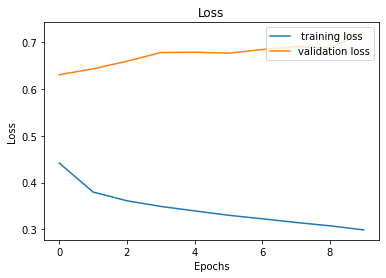

In [ ]:
import matplotlib.pyplot as plt

plt.plot(cnn_history.history['loss'], label=' training loss')
plt.plot(cnn_history.history['val_loss'], label='validation loss')
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(loc="upper right")
plt.show()

# preparing test and train

In [ ]:
from keras.preprocessing.text import Tokenizer

X_train = train_data['comment']
y_train = train_data['label_id']
vocab_size = 10000
oov_token = "<OOV>"
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts(X_train.astype(str))

X_train_sequences = tokenizer.texts_to_sequences(X_train.astype(str))

X_test = validation_data['comment']
y_test = validation_data['label_id']

X_test_sequences = tokenizer.texts_to_sequences(X_test.astype(str))

max_length = 100
padding_type='post'
truncation_type='post'

from keras.preprocessing.sequence import pad_sequences

X_test_padded = pad_sequences(X_test_sequences,maxlen=max_length, 
                               padding=padding_type, truncating=truncation_type)

X_train_padded = pad_sequences(X_train_sequences,maxlen=max_length, padding=padding_type, 
                       truncating=truncation_type)

# **CNN**

In [ ]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional

model = tf.keras.Sequential()
model.add(Embedding(input_dim=len(word_index) + 1,
                            output_dim=max_length,
                            weights=[embedding_matrix],
                            input_length=max_length,
                            trainable=True))
model.add(layers.Conv1D(64, 8, activation='relu'))
model.add(layers.MaxPooling1D(2))

model.add(layers.Dense(32, activation="relu"))
model.add(layers.Dense(16, activation="relu"))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(2, activation="softmax"))

model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
history = model.fit(X_train_padded, y_train, epochs=10, validation_data=(X_test_padded, y_test))


Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1771/1771 [==============================] - 21s 11ms/step - loss: 0.4003 - accuracy: 0.8204 - val_loss: 0.3740 - val_accuracy: 0.8364
Epoch 2/10
1771/1771 [==============================] - 12s 7ms/step - loss: 0.3572 - accuracy: 0.8453 - val_loss: 0.3637 - val_accuracy: 0.8425
Epoch 3/10
1771/1771 [==============================] - 11s 6ms/step - loss: 0.3366 - accuracy: 0.8562 - val_loss: 0.3806 - val_accuracy: 0.8337
Epoch 4/10
1771/1771 [==============================] - 11s 6ms/step - loss: 0.3160 - accuracy: 0.8668 - val_loss: 0.4002 - val_accuracy: 0.8283
Epoch 5/10
1771/1771 [==============================] - 11s 6ms/step - loss: 0.2944 - accuracy: 0.8779 - val_loss: 0.3883 - val_accuracy: 0.8369
Epoch 6/10
1771/1771 [==============================] - 11s 6ms/step - loss: 0.2696 - accuracy: 0.8905 - val_loss: 0.4206 - val_accuracy: 0.8272
Epoch 7/10
1771/1771 [==============================] - 11s 6ms/step - loss: 0.2468 - accuracy: 0.9010 - val_loss: 0.4493 - val_accuracy: 0.

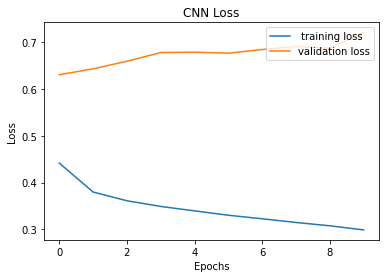

In [ ]:
import matplotlib.pyplot as plt

plt.plot(cnn_history.history['loss'], label=' training loss')
plt.plot(cnn_history.history['val_loss'], label='validation loss')
plt.title('CNN Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(loc="upper right")
plt.show()

In [ ]:
loss, accuracy = model.evaluate(X_test_padded,y_test)
print('Test accuracy :', accuracy)

197/197 [==============================] - 1s 4ms/step - loss: 0.5572 - accuracy: 0.8156
Test accuracy : 0.8156265020370483


In [ ]:
from sklearn.metrics import classification_report

predictions = model.predict(X_test_padded)
predict_results = predictions.argmax(axis=1)
# print(predictions)
# print(predict_results)

print(classification_report(y_test.tolist(), predict_results))

              precision    recall  f1-score   support

           0       0.81      0.82      0.82      3148
           1       0.82      0.81      0.82      3149

    accuracy                           0.82      6297
   macro avg       0.82      0.82      0.82      6297
weighted avg       0.82      0.82      0.82      6297



In [ ]:
model.save('/content/drive/MyDrive/cnn_model.h5')

# json_config = model.to_json()
# new_model = keras.models.model_from_json(json_config)
# new_model.save('/content/drive/MyDrive/cnn_model.h5')

# config = model.get_config()
# new_model = keras.Sequential.from_config(config)
# new_model.save('/content/drive/MyDrive/cnn_model.h5')

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = tf.keras.Sequential()
model.add(Embedding(input_dim=len(word_index) + 1,
                            output_dim=max_length,
                            weights=[embedding_matrix],
                            input_length=max_length,
                            trainable=True))
model.add(layers.Conv1D(64, 8, activation='relu'))
model.add(layers.MaxPooling1D(2))

model.add(layers.Dense(32, activation="relu"))
model.add(layers.Dense(16, activation="relu"))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(2, activation="softmax"))

model.compile(loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
history = model.fit(train_ds.shuffle(56700).batch(128), epochs=10, validation_data=valid_ds.batch(128), verbose=1)


Epoch 1/100


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


443/443 [==============================] - 6s 12ms/step - loss: 0.4512 - accuracy: 0.7837 - val_loss: 0.6186 - val_accuracy: 0.6763
Epoch 2/100
443/443 [==============================] - 3s 8ms/step - loss: 0.3446 - accuracy: 0.8580 - val_loss: 0.6260 - val_accuracy: 0.6697
Epoch 3/100
443/443 [==============================] - 4s 8ms/step - loss: 0.3153 - accuracy: 0.8732 - val_loss: 0.6308 - val_accuracy: 0.6657
Epoch 4/100
443/443 [==============================] - 4s 8ms/step - loss: 0.2864 - accuracy: 0.8869 - val_loss: 0.6706 - val_accuracy: 0.6606
Epoch 5/100
443/443 [==============================] - 4s 8ms/step - loss: 0.2587 - accuracy: 0.8999 - val_loss: 0.6836 - val_accuracy: 0.6471
Epoch 6/100
443/443 [==============================] - 4s 8ms/step - loss: 0.2296 - accuracy: 0.9117 - val_loss: 0.7492 - val_accuracy: 0.6440
Epoch 7/100
443/443 [==============================] - 4s 8ms/step - loss: 0.1987 - accuracy: 0.9254 - val_loss: 0.7486 - val_accuracy: 0.6492
Epoch 8/10

In [ ]:
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.models import Sequential
model = Sequential([
    embedding_layer,
    Bidirectional(LSTM(150, return_sequences=True)), 
    Bidirectional(LSTM(150)),
    Dense(128, activation='relu'),
   Dense(2, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

# from tensorflow.keras.callbacks import EarlyStopping, TensorBoard

# log_folder = 'logs'
# callbacks = [
#             EarlyStopping(patience = 10),
#             TensorBoard(log_dir=log_folder)
#             ]
# num_epochs = 600
history = model.fit(train_ds.shuffle(56700).batch(128), epochs=10, validation_data=valid_ds.batch(128), verbose=1)

Epoch 1/10
443/443 [==============================] - 25s 45ms/step - loss: 0.6934 - accuracy: 0.4993 - val_loss: 0.6930 - val_accuracy: 0.5045
Epoch 2/10
443/443 [==============================] - 18s 42ms/step - loss: 0.6934 - accuracy: 0.5012 - val_loss: 0.6931 - val_accuracy: 0.5002
Epoch 3/10
443/443 [==============================] - 19s 42ms/step - loss: 0.6932 - accuracy: 0.5010 - val_loss: 0.6932 - val_accuracy: 0.4999
Epoch 4/10
443/443 [==============================] - 19s 42ms/step - loss: 0.6932 - accuracy: 0.4980 - val_loss: 0.6931 - val_accuracy: 0.5002
Epoch 5/10
443/443 [==============================] - 19s 42ms/step - loss: 0.6932 - accuracy: 0.4991 - val_loss: 0.6931 - val_accuracy: 0.4999
Epoch 6/10
443/443 [==============================] - 19s 42ms/step - loss: 0.6932 - accuracy: 0.5010 - val_loss: 0.6941 - val_accuracy: 0.5055
Epoch 7/10
443/443 [==============================] - 19s 43ms/step - loss: 0.6928 - accuracy: 0.5027 - val_loss: 0.6930 - val_accuracy:

# **LSTM**

In [ ]:
lstm_model = tf.keras.Sequential()
lstm_model.add(tf.keras.layers.Embedding(input_dim=len(word_index) + 1,
                            output_dim=max_length,
                            weights=[embedding_matrix],
                            input_length=max_length,
                            trainable=True))
lstm_model.add(tf.keras.layers.Conv1D(128, 3, activation='relu'))                               
lstm_model.add(tf.keras.layers.GlobalMaxPooling1D())
lstm_model.add(tf.keras.layers.Dropout(0))
lstm_model.add(tf.keras.layers.Dense(2, activation='sigmoid'))
                              
lstm_model.summary()
lstm_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer='adam', metrics=["Accuracy"])
lstm_history = lstm_model.fit(X_train_padded, y_train, epochs=10, validation_data=(X_test_padded, y_test))

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 100, 100)          1949700   
                                                                 
 conv1d_8 (Conv1D)           (None, 98, 128)           38528     
                                                                 
 global_max_pooling1d_8 (Glo  (None, 128)              0         
 balMaxPooling1D)                                                
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_22 (Dense)            (None, 2)                 258       
                                                                 
Total params: 1,988,486
Trainable params: 1,988,486
Non-trainable params: 0
____________________________________________

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1771/1771 [==============================] - 11s 5ms/step - loss: 0.4006 - Accuracy: 0.8199 - val_loss: 0.3739 - val_Accuracy: 0.8331
Epoch 2/10
1771/1771 [==============================] - 9s 5ms/step - loss: 0.3311 - Accuracy: 0.8571 - val_loss: 0.3777 - val_Accuracy: 0.8369
Epoch 3/10
1771/1771 [==============================] - 9s 5ms/step - loss: 0.2733 - Accuracy: 0.8864 - val_loss: 0.4091 - val_Accuracy: 0.8274
Epoch 4/10
1771/1771 [==============================] - 10s 6ms/step - loss: 0.2138 - Accuracy: 0.9153 - val_loss: 0.4555 - val_Accuracy: 0.8202
Epoch 5/10
1771/1771 [==============================] - 9s 5ms/step - loss: 0.1646 - Accuracy: 0.9367 - val_loss: 0.5458 - val_Accuracy: 0.7878
Epoch 6/10
1771/1771 [==============================] - 9s 5ms/step - loss: 0.1277 - Accuracy: 0.9518 - val_loss: 0.6130 - val_Accuracy: 0.8015
Epoch 7/10
1771/1771 [==============================] - 11s 6ms/step - loss: 0.1015 - Accuracy: 0.9616 - val_loss: 0.6791 - val_Accuracy: 0.7990


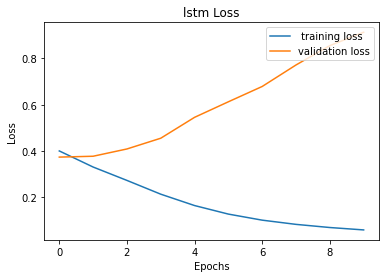

In [ ]:
import matplotlib.pyplot as plt

plt.plot(lstm_history.history['loss'], label=' training loss')
plt.plot(lstm_history.history['val_loss'], label='validation loss')
plt.title('lstm Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(loc="upper right")
plt.show()

In [ ]:
loss, accuracy = lstm_model.evaluate(X_test_padded,y_test)
print('Test accuracy :', accuracy)

197/197 [==============================] - 1s 3ms/step - loss: 0.9134 - Accuracy: 0.7818
Test accuracy : 0.7818008661270142


In [ ]:
predictions = lstm_model.predict(X_test_padded)
predict_results = predictions.argmax(axis=1)

print(classification_report(y_test.tolist(), predict_results))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78      3148
           1       0.78      0.78      0.78      3149

    accuracy                           0.78      6297
   macro avg       0.78      0.78      0.78      6297
weighted avg       0.78      0.78      0.78      6297



In [ ]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.4 MB 24.9 MB/s 
     |████████████████████████████████| 596 kB 62.6 MB/s 
     |████████████████████████████████| 6.6 MB 43.7 MB/s 
     |████████████████████████████████| 101 kB 14.5 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
pip install sentencepiece

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.2 MB 26.4 MB/s 


In [ ]:
from transformers import MBartTokenizer, BertTokenizer
from transformers import MBartModel, BertPreTrainedModel, BertForSequenceClassification, BertForSequenceClassification
from transformers import MBartModel, MBartPreTrainedModel, MBartForSequenceClassification, TFBertForSequenceClassification

tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased', do_lower_case=False)
# tokenizer = MBartTokenizer.from_pretrained(tokenizer_file=None, src_lang=None, tgt_lang=None)


Downloading:   0%|          | 0.00/972k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/625 [00:00<?, ?B/s]

In [ ]:
train_data = pd.read_csv("/content/drive/MyDrive/clean_train.csv") 
validation_data = pd.read_csv("/content/drive/MyDrive/clean_validation.csv") 

train_data = train_data[['comment','label_id']]
validation_data = validation_data[['comment','label_id']]

train_df = train_data

# XLM_roberta

In [ ]:
from simpletransformers.classification import ClassificationModel, ClassificationArgs
import pandas as pd
import logging


model_args = ClassificationArgs()
model_args.lazy_loading = True


logging.basicConfig(level=logging.INFO)
transformers_logger = logging.getLogger("transformers")
transformers_logger.setLevel(logging.WARNING)



# Optional model configuration
model_args = ClassificationArgs()
model_args.num_train_epochs= 3
model_args.no_cache = True
model_args.evaluate_during_training = True
# model_args.labels_list = ['0', "1"]

# Create a ClassificationModel
model = ClassificationModel(
    "xlmroberta",
    "xlm-roberta-base",
    args=model_args,
)

# Train the model
model.train_model(train_df, eval_df=validation_data)

Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaForSequenceClassification: ['lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.decoder.weight', 'roberta.pooler.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.layer_norm.weight', 'lm_head.bias', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing XLMRobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.out_p

Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 0 of 3:   0%|          | 0/7088 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:1443: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."
INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


  0%|          | 0/6300 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:1443: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."
INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


  0%|          | 0/6300 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:1443: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."
INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


  0%|          | 0/6300 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:1443: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."
INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


  0%|          | 0/6300 [00:00<?, ?it/s]

Running Epoch 1 of 3:   0%|          | 0/7088 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:1443: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."
INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


  0%|          | 0/6300 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:1443: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."
INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


  0%|          | 0/6300 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:1443: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."
INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


  0%|          | 0/6300 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:1443: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."
INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


  0%|          | 0/6300 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:1443: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."
INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


  0%|          | 0/6300 [00:00<?, ?it/s]

Running Epoch 2 of 3:   0%|          | 0/7088 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:1443: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."
INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


  0%|          | 0/6300 [00:00<?, ?it/s]

RuntimeError: ignored

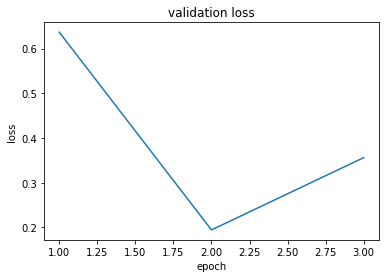

In [1]:
import matplotlib.pyplot as plt

x = [1,2,3]
y = [0.6367, 0.1943, 0.356]

plt.plot(x, y)

plt.xlabel('epoch')
plt.ylabel('loss')

plt.title('validation loss')

plt.show()

In [ ]:
# Evaluate the model
result, model_outputs, wrong_predictions = model.eval_model(validation_data)

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:1443: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."
INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


  0%|          | 0/6300 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_utils: Saving features into cached file cache_dir/cached_dev_xlmroberta_128_2_2


Running Evaluation:   0%|          | 0/788 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_model:{'mcc': 0.7288144122319423, 'tp': 2856, 'tn': 2581, 'fp': 569, 'fn': 294, 'auroc': 0.9298327034517511, 'auprc': 0.9163157658012854, 'eval_loss': 0.356897721435818}


In [ ]:
from sklearn.metrics import f1_score, accuracy_score

def f1_class(labels, preds):
    return f1_score(labels, preds, average='micro')

result, model_outputs, wrong_predictions = model.eval_model(validation_data, f1=f1_class, acc=accuracy_score)



/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:1443: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."
INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


  0%|          | 0/6300 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_utils: Saving features into cached file cache_dir/cached_dev_xlmroberta_128_2_2


Running Evaluation:   0%|          | 0/788 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_model:{'mcc': 0.7288144122319423, 'tp': 2856, 'tn': 2581, 'fp': 569, 'fn': 294, 'auroc': 0.9298327034517511, 'auprc': 0.9163157658012854, 'eval_loss': 0.356897721435818, 'f1': 0.863015873015873, 'acc': 0.863015873015873}


# MBERT

In [ ]:
from simpletransformers.classification import ClassificationModel, ClassificationArgs
import pandas as pd
import logging

model_args = ClassificationArgs()
model_args.lazy_loading = True


logging.basicConfig(level=logging.INFO)
transformers_logger = logging.getLogger("transformers")
transformers_logger.setLevel(logging.WARNING)



# Optional model configuration
model_args = ClassificationArgs()
model_args.num_train_epochs= 3
model_args.no_cache = True
model_args.evaluate_during_training = True
# model_args.labels_list = ['0', "1"]

# Create a ClassificationModel
model = ClassificationModel(
    "bert",
    "bert-base-multilingual-cased",
    args=model_args,
)

# Train the model
model.train_model(train_df)

Downloading:   0%|          | 0.00/625 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/681M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model ch

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/972k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.87M [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:602: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."
INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


  0%|          | 0/56700 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_utils: Saving features into cached file cache_dir/cached_train_bert_128_2_2
/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:310: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 0 of 3:   0%|          | 0/7088 [00:00<?, ?it/s]

Running Epoch 1 of 3:   0%|          | 0/7088 [00:00<?, ?it/s]

Running Epoch 2 of 3:   0%|          | 0/7088 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_model: Training of bert model complete. Saved to outputs/.


(21264, 0.4118813318673429)

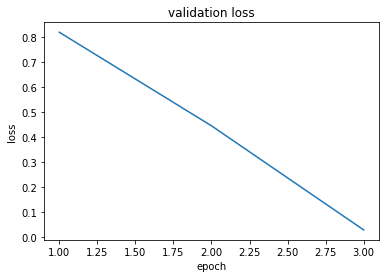

In [2]:
import matplotlib.pyplot as plt

x = [1,2,3]
y = [0.8181,  0.4452, 0.0302]

plt.plot(x, y)

plt.xlabel('epoch')
plt.ylabel('loss')

plt.title('validation loss')

plt.show()

In [ ]:
from sklearn.metrics import f1_score, accuracy_score

def f1_class(labels, preds):
    return f1_score(labels, preds, average='micro')

result, model_outputs, wrong_predictions = model.eval_model(validation_data, f1=f1_class, acc=accuracy_score)

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:1443: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."
INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


  0%|          | 0/6300 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_utils: Saving features into cached file cache_dir/cached_dev_bert_128_2_2


Running Evaluation:   0%|          | 0/788 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_model:{'mcc': 0.7258157718116001, 'tp': 2887, 'tn': 2535, 'fp': 615, 'fn': 263, 'auroc': 0.9284045855379189, 'auprc': 0.9098599404918057, 'f1': 0.8606349206349206, 'acc': 0.8606349206349206, 'eval_loss': 0.37245919982793974}
